## BUSINESSS UNDERSTANDING 

In this data-driven journey, we will venture into the realm of disease prediction using machine learning, guided by our expert data scientist. Our dataset contains vital information regarding the diagnosis of heart disease patients. Through the power of machine learning, we aim to predict whether an individual is susceptible to heart disease, leveraging features such as chest pain type, age, sex, and more.

Heart disease stands as a prominent cause of morbidity and mortality on a global scale. Predicting cardiovascular disease is a crucial area within clinical data analysis, considering its profound impact on public health. The healthcare industry harbors a vast reservoir of data, and the process of data mining transforms this extensive healthcare repository into actionable insights, facilitating informed decision-making and predictions.

Our journey unfolds by training machine learning models capable of discerning the presence or absence of heart disease based on a comprehensive set of attributes. To achieve this, we draw upon the Cleveland Heart Disease dataset, sourced from the UCI repository. As we traverse this path, each line of code and model developed brings us closer to unraveling the secrets of disease prediction.

Our ultimate goal is to empower healthcare professionals and individuals with data-driven insights, enhancing their ability to make early and accurate predictions regarding heart disease. Through the utilization of machine learning, we aim to contribute to the vital task of improving public health and the well-being of individuals across the world.

age: Age of the individual.
sex: Gender of the individual .
cp: Chest pain type.
trestbps: Resting blood pressure.
chol: Serum cholesterol level.
fbs: Fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false).
restecg: Resting electrocardiographic results.
thalach: Maximum heart rate achieved.
exang: Exercise induced angina (1 = yes; 0 = no).
oldpeak: ST depression induced by exercise relative to rest.
slope: Slope of the peak exercise ST segment.
ca: Number of major vessels colored by fluoroscopy.
thal: Thalassemia type.
condition: Target variable indicating the presence or absence of a heart condition .

Hypothesis: There is a significant difference in the prevalence of heart conditions between males and females.
Null Hypothesis: there is no signnificant in the prevalence of heart conditions between males and females




## DATA UNDERSTANDING 

In [16]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
#loading the data 
df= pd.read_csv("data/heart_cleveland_upload.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [18]:
#checking null value 
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [19]:
# the shape of the data 
df.shape

(297, 14)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [21]:
#Examining Data Types
datatype = df.dtypes

# Display or print the 'datatype' Series
datatype

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

####  Identifying Numerical and Categorical Features

In [22]:

numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'condition']
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Create lists 'numeric_features' and 'cat_features'
numeric_features = [col for col in numeric_columns if col in df.columns]
cat_features = [col for col in cat_columns if col in df.columns]

# Display or print the lists
print("Numeric Features:", numeric_features)
print("Categorical Features:", cat_features)


Numeric Features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'condition']
Categorical Features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


####  Converting Features to Categorical Data Types

In [23]:

lst = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Select the specified columns and change their data type to 'object'
df[lst] = df[lst].astype(object)

# Obtain the updated data types of the columns
dtype = df.dtypes

# Display or print the 'dtype' Series
dtype

age            int64
sex           object
cp            object
trestbps       int64
chol           int64
fbs           object
restecg       object
thalach        int64
exang         object
oldpeak      float64
slope         object
ca            object
thal          object
condition      int64
dtype: object

### EDA 

Exploring Feature Correlations

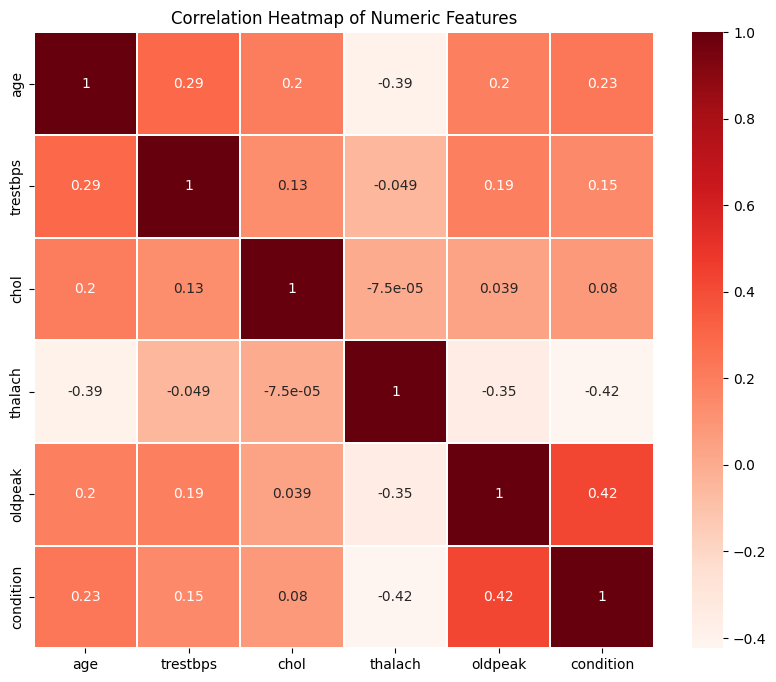

In [24]:
# Select relevant columns for correlation analysis
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'condition']
corr_data = df[numeric_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='Reds', linewidths=0.1)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

 Visualizing Health Conditions

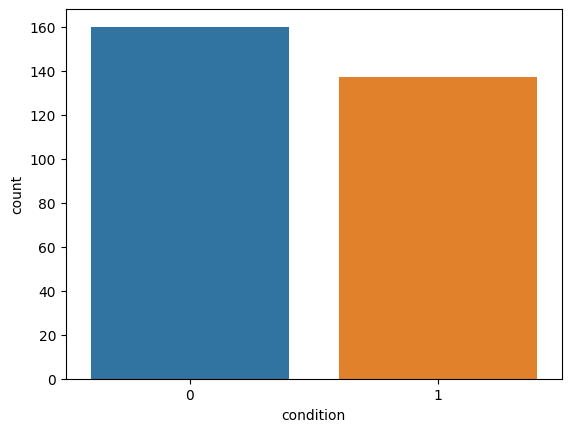

In [25]:
# Create a countplot
condition_ax = sns.countplot(x=df["condition"])

# Display the countplot
plt.show()

Analyzing Health Conditions by Gender

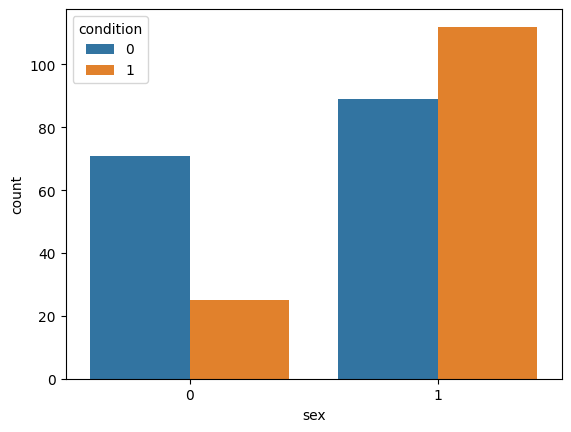

In [26]:
# Create a countplot with hue
sex_ax = sns.countplot(x=df["sex"], hue=df['condition'])

# Display the countplot
plt.show()

Examining Chest Pain Types and Health Conditions

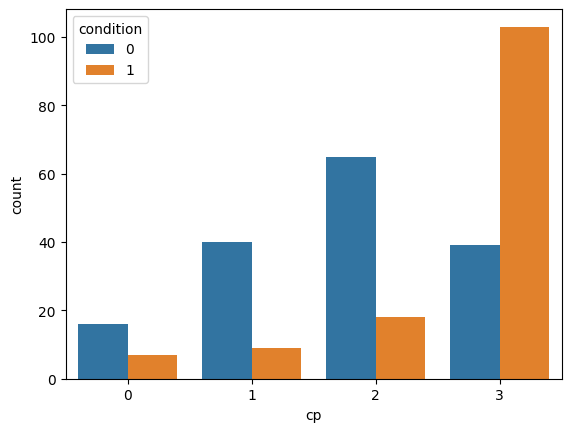

In [27]:
# Create a countplot with hue
cp_ax = sns.countplot(x=df["cp"], hue=df['condition'])

# Display the countplot
plt.show()

Investigating Fasting Blood Sugar Levels and Health Conditions

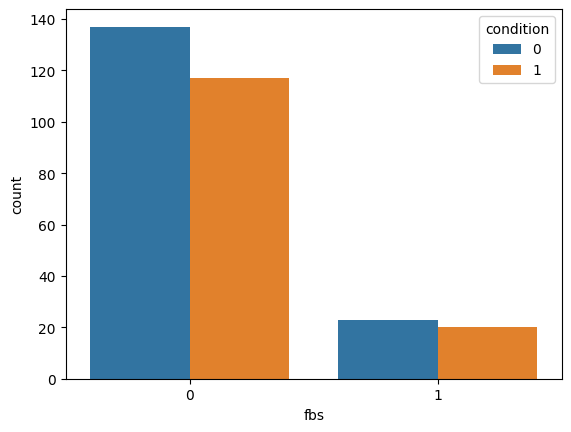

In [28]:
# Create a countplot with hue
fbs_ax = sns.countplot(x=df["fbs"], hue=df['condition'])

# Display the countplot
plt.show()

Analyzing Resting Electrocardiographic Results and Health Conditions

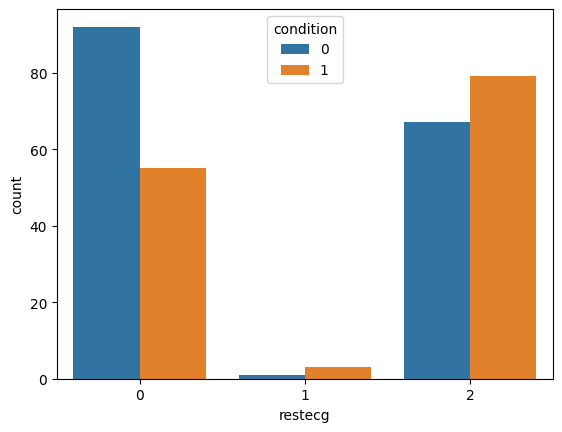

In [29]:
# Create a countplot with hue
restecg_ax = sns.countplot(x=df["restecg"], hue=df['condition'])

# Display the countplot
plt.show()

Examining Exercise-Induced Angina and Health Conditions

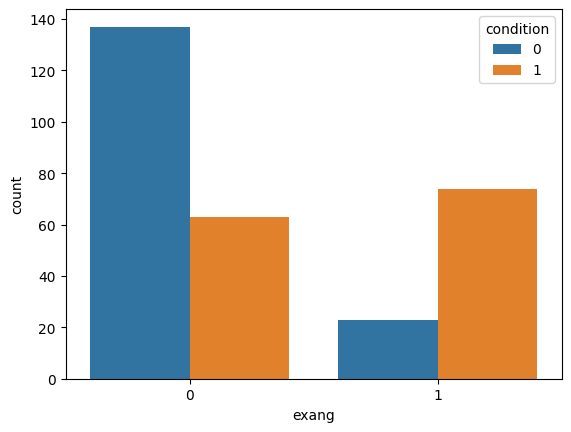

In [30]:
# Create a countplot with hue
exang_ax = sns.countplot(x=df["exang"], hue=df['condition'])

# Display the countplot
plt.show()

Investigating the Slope of the ST Segment and Health Conditions

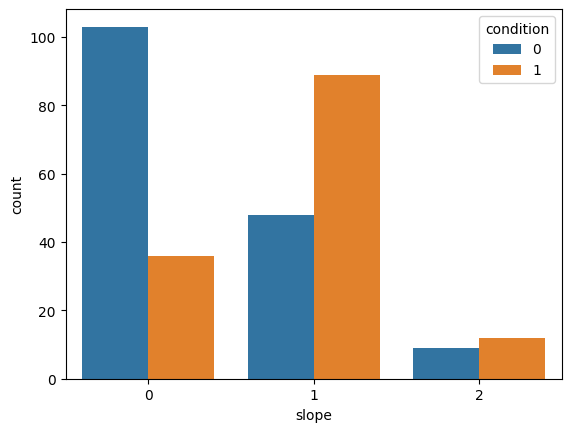

In [31]:
# Create a countplot with hue
slope_ax = sns.countplot(x=df["slope"], hue=df['condition'])

# Display the countplot
plt.show()

Analyzing the Number of Major Vessels Colored by Fluoroscopy and Health Conditions

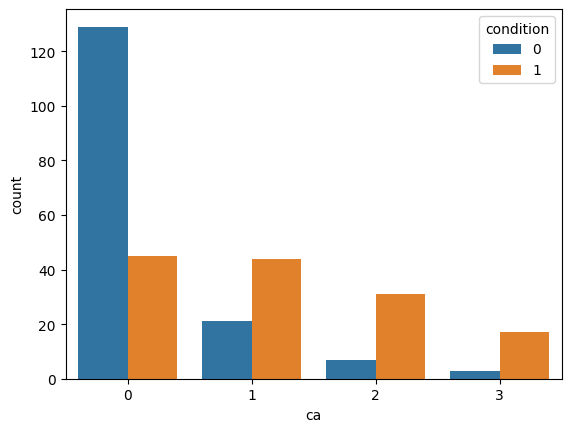

In [32]:
# Create a countplot with hue
ca_ax = sns.countplot(x=df["ca"], hue=df['condition'])

# Display the countplot
plt.show()

Examining Thalassemia and Health Conditions

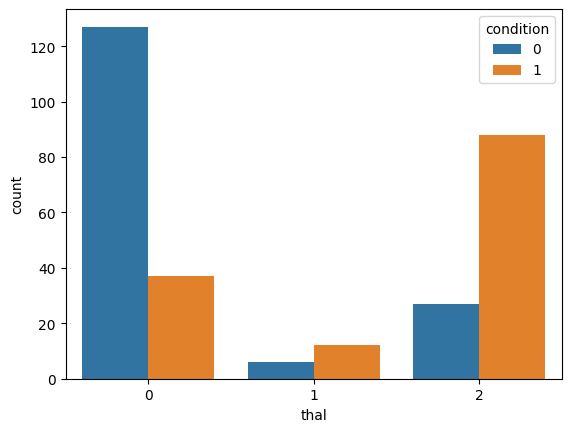

In [33]:
thal_ax = sns.countplot(x=df["thal"], hue=df['condition'])

# Display the countplot
plt.show()

 Visualizing Age Distribution

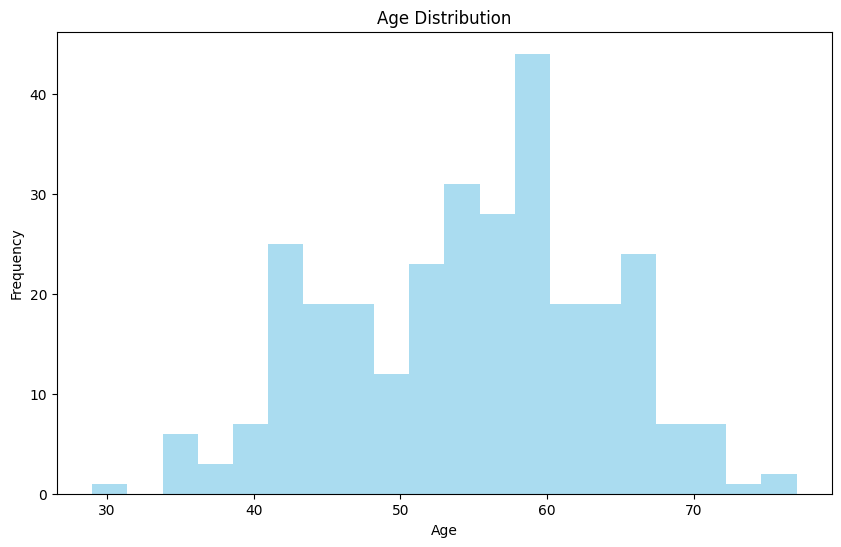

In [34]:
# Extract the 'age' column and store it in the 'age_col' variable
age_col = df['age']

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Generate a histogram for the 'age' column
plt.hist(age_col, bins=20, color='skyblue', alpha=0.7)

# Label the x-axis
plt.xlabel('Age')

# Label the y-axis
plt.ylabel('Frequency')

# Set the title
plt.title('Age Distribution')

# Display the histogram
plt.show()


 Visualizing Resting Blood Pressure Distribution

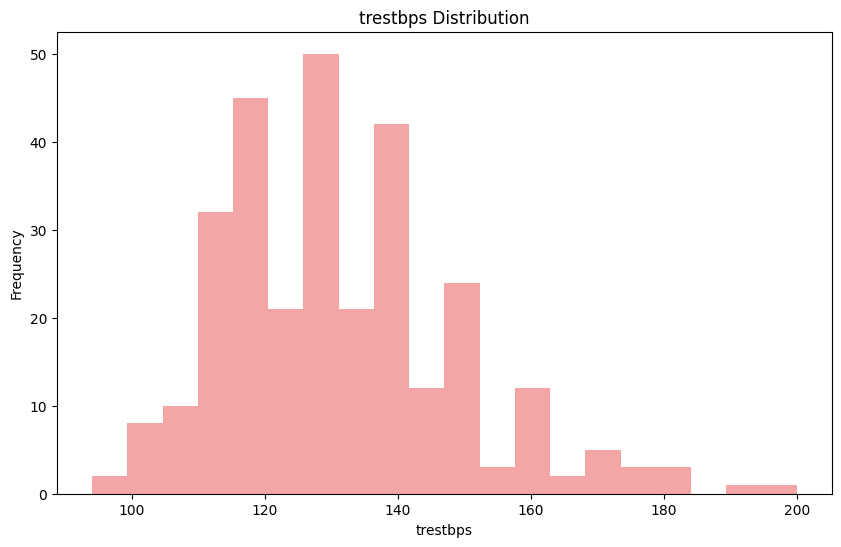

In [35]:
# Extract the 'trestbps' column and store it in the 'trestbps_col' variable
trestbps_col = df['trestbps']

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Generate a histogram for the 'trestbps' column
plt.hist(trestbps_col, bins=20, color='lightcoral', alpha=0.7)

# Label the x-axis
plt.xlabel('trestbps')

# Label the y-axis
plt.ylabel('Frequency')

# Set the title
plt.title('trestbps Distribution')

# Display the histogram
plt.show()

 Visualizing Cholesterol Distribution

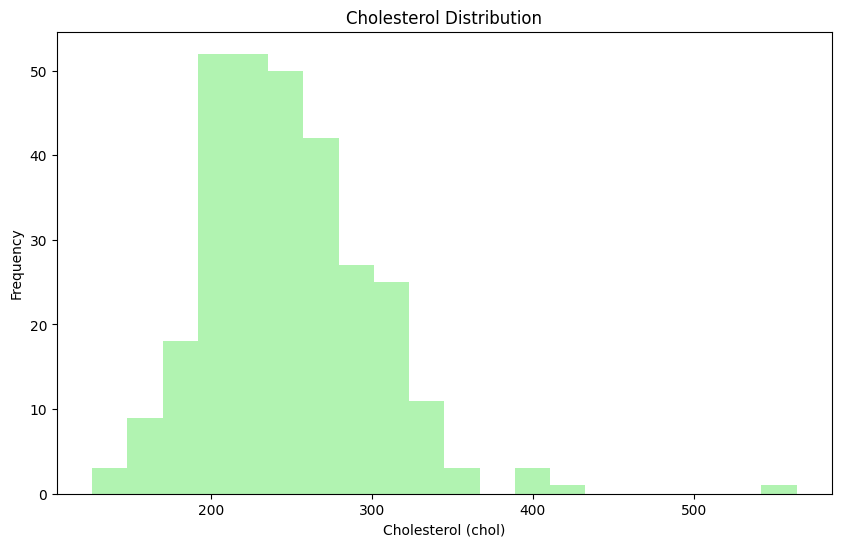

In [36]:
# Extract the 'chol' column and store it in the 'chol_col' variable
chol_col = df['chol']

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Generate a histogram for the 'chol' column
plt.hist(chol_col, bins=20, color='lightgreen', alpha=0.7)

# Label the x-axis
plt.xlabel('Cholesterol (chol)')

# Label the y-axis
plt.ylabel('Frequency')

# Set the title
plt.title('Cholesterol Distribution')

# Display the histogram
plt.show()

Visualizing Maximum Heart Rate Distribution

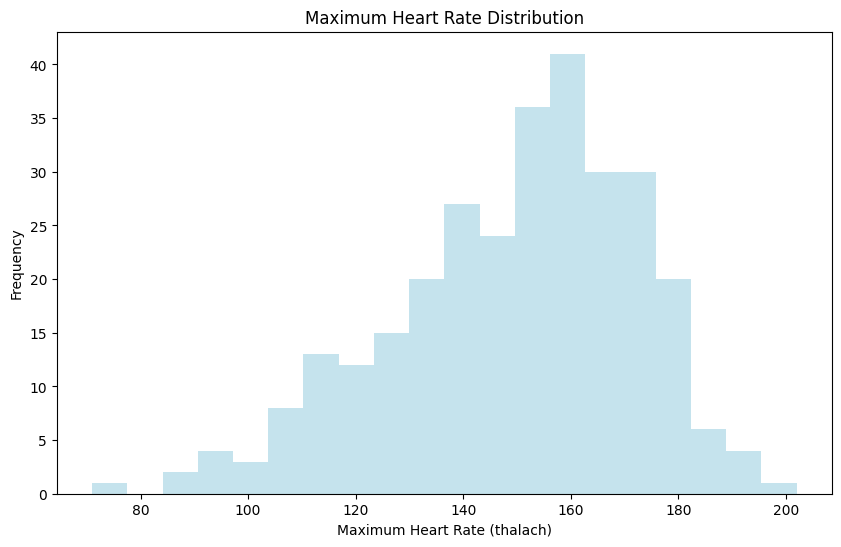

In [37]:

# Extract the 'thalach' column and store it in the 'thalach_col' variable
thalach_col = df['thalach']

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Generate a histogram for the 'thalach' column
plt.hist(thalach_col, bins=20, color='lightblue', alpha=0.7)

# Label the x-axis
plt.xlabel('Maximum Heart Rate (thalach)')

# Label the y-axis
plt.ylabel('Frequency')

# Set the title
plt.title('Maximum Heart Rate Distribution')

# Display the histogram
plt.show()


Visualizing ST Depression Distribution

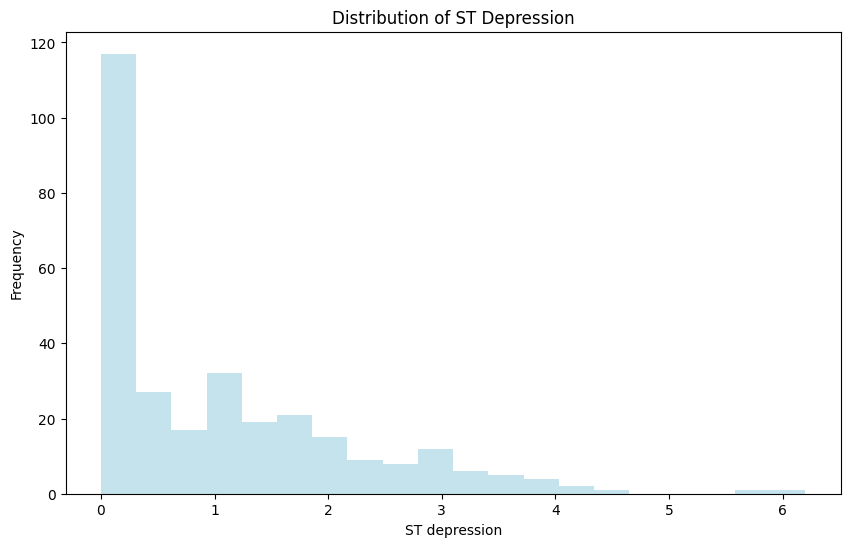

In [38]:
# Extract the 'oldpeak' column and store it in the 'oldpeak_col' variable
oldpeak_col = df['oldpeak']

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Generate a histogram for the 'oldpeak' column
plt.hist(oldpeak_col, bins=20, color='lightblue', alpha=0.7)

# Label the x-axis
plt.xlabel('ST depression')

# Label the y-axis
plt.ylabel('Frequency')

# Set the title
plt.title('Distribution of ST Depression')

# Display the histogram
plt.show()


Visualizing Chest Pain Types, Age, and Health Conditions

C:\Users\manca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


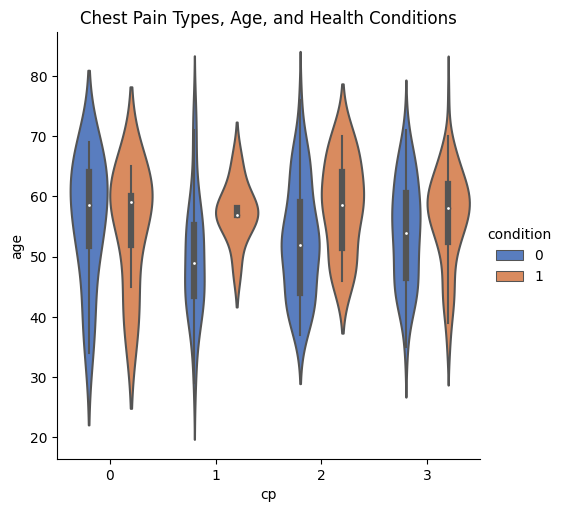

In [39]:
# Create a violin plot using sns.catplot()
violinplt = sns.catplot(x='cp', y='age', hue='condition', kind='violin', data=df, palette='muted')

# Set the title
plt.title('Chest Pain Types, Age, and Health Conditions')

# Display the plot
plt.show()

Analyzing Fasting Blood Sugar Levels and Health Conditions

C:\Users\manca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


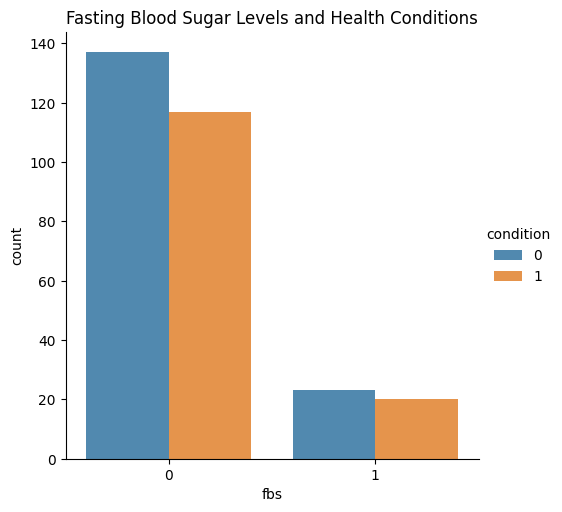

In [40]:
# Create a count plot using sns.catplot()
countplt = sns.catplot(x='fbs', hue='condition', kind='count', data=df, alpha=0.85)

# Set the title
plt.title('Fasting Blood Sugar Levels and Health Conditions')

# Display the plot
plt.show()

## DATA PREPARATION 

Encoding Categorical Features

In [41]:

# Step 1: Create a list 'categorical_cols' containing the names of the categorical columns to be encoded
categorical_cols = ['cp', 'thal', 'slope']

# Step 2: Iterate through the columns in 'categorical_cols' and cast each column in the original DataFrame 'df' to the integer data type
for col in categorical_cols:
    df[col] = df[col].astype(int)

# Step 3: Utilize 'pd.get_dummies()' to perform one-hot encoding on the specified categorical columns in 'df'
df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix_sep='_', dtype=int)

# Step 4: Convert the encoded DataFrame to integer data type
df_encoded = df_encoded.astype(int)

# Step 5: Check the data types of the columns in the 'df_encoded' DataFrame
encoded_dtypes = df_encoded.dtypes

# Display the resulting encoded DataFrame and data types
df_encoded.head()
encoded_dtypes

#--- Inspect data ---

age          int32
sex          int32
trestbps     int32
chol         int32
fbs          int32
restecg      int32
thalach      int32
exang        int32
oldpeak      int32
ca           int32
condition    int32
cp_0         int32
cp_1         int32
cp_2         int32
cp_3         int32
thal_0       int32
thal_1       int32
thal_2       int32
slope_0      int32
slope_1      int32
slope_2      int32
dtype: object

 Preparing Features and Target Variable

In [42]:
# Separate features (x) and target variable (y)
x = df_encoded.drop('condition', axis=1)
y = df_encoded['condition']

# Display the resulting 'x' and 'y'

x.head()


y.head()

0    0
1    0
2    0
3    1
4    0
Name: condition, dtype: int32

Scaling Features

In [43]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x

array([[0.83333333, 1.        , 0.62264151, ..., 0.        , 1.        ,
        0.        ],
       [0.83333333, 0.        , 0.43396226, ..., 1.        , 0.        ,
        0.        ],
       [0.77083333, 0.        , 0.52830189, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.125     , 1.        , 0.24528302, ..., 0.        , 1.        ,
        0.        ],
       [0.125     , 0.        , 0.41509434, ..., 1.        , 0.        ,
        0.        ],
       [0.125     , 1.        , 0.30188679, ..., 1.        , 0.        ,
        0.        ]])

## MODELING 

Splitting the Data into Training and Testing Sets

In [44]:
from sklearn.model_selection import train_test_split

# Assuming you have 'x' as predictors and 'y' as the target variable

# Use train_test_split to split the data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=4)

# Display the sizes of the resulting sets
X_train.shape
X_test.shape
Y_train.shape
Y_test.shape

(60,)

 Building and Evaluating Logistic Regression Model

In [45]:
#lr_mean_score  = ...
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create Logistic Regression model
lr_model = LogisticRegression()

# Fit the model to the training data
lr_model.fit(X_train, Y_train)

# Perform cross-validation with 10 folds
lr_cv_results = cross_val_score(lr_model, X_train, Y_train, cv=10)

# Calculate the mean score from cross-validation
lr_mean_score = round(lr_cv_results.mean(), 4)

# Display the mean score
lr_mean_score


0.8268

 Building and Evaluating Linear Discriminant Analysis Model

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

# Create Linear Discriminant Analysis model
ldr_model = LinearDiscriminantAnalysis()

# Fit the model to the training data
ldr_model.fit(X_train, Y_train)

# Perform cross-validation with 10 folds
ldr_cv_results = cross_val_score(ldr_model, X_train, Y_train, cv=10)

# Calculate the mean score from cross-validation
ldr_mean_score = round(ldr_cv_results.mean(), 4)

# Display the mean score
ldr_mean_score


0.8266

Building and Evaluating K-Nearest Neighbors (KNN) Model

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Create KNN model
knn_model = KNeighborsClassifier()

# Fit the model to the training data
knn_model.fit(X_train, Y_train)

# Perform cross-validation with 10 folds
knn_cv_results = cross_val_score(knn_model, X_train, Y_train, cv=10)

# Calculate the mean score and standard deviation from cross-validation
knn_mean_score = round(knn_cv_results.mean(), 4)
knn_std_score = round(knn_cv_results.std(), 4)

# Display the mean score and standard deviation
knn_mean_score
knn_std_score

0.0767

Building and Evaluating Decision Tree Classifier Model

In [48]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
# Create Decision Tree Classifier model with a fixed random state
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, Y_train)

# Perform cross-validation with 10 folds
dt_cv_results = cross_val_score(dt_model, X_train, Y_train, cv=10)

# Calculate the mean score from cross-validation
dt_mean_score = round(dt_cv_results.mean(), 4)


# Display the mean score
dt_mean_score

0.7085

: Building and Evaluating Gaussian Naive Bayes Model

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Create Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Fit the model to the training data
gnb_model.fit(X_train, Y_train)

# Perform cross-validation with 10 folds
gnb_cv_results = cross_val_score(gnb_model, X_train, Y_train, cv=10)

# Calculate the mean score from cross-validation
gnb_mean_score = round(gnb_cv_results.mean(), 4)

# Display the mean score
gnb_mean_score

0.852

: Building and Evaluating Random Forest Classifier Model¶

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score



# Create Random Forest classifier model()
rf_model = RandomForestClassifier(random_state=42)


# Fit the model to the training data
rf_model.fit(X_train, Y_train)

# Perform cross-validation with 10 folds
rf_cv_results = cross_val_score(rf_model, X_train, Y_train, cv=10)

# Calculate the mean score from cross-validation
rf_mean_score = round(rf_cv_results.mean(), 4)

# Display the mean score
rf_mean_score


0.8098

Building and Evaluating Support Vector Classifier (SVC) Model

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Create Support Vector Classifier (SVC) model
sv_model = SVC()

# Fit the model to the training data
sv_model.fit(X_train, Y_train)

# Perform cross-validation with 10 folds
sv_cv_results = cross_val_score(sv_model, X_train, Y_train, cv=10)

# Calculate the mean score from cross-validation
sv_mean_score = round(sv_cv_results.mean(), 4)

# Display the mean score
sv_mean_score

0.8183

## EVALUATION 

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming gnb_model is the chosen Gaussian Naive Bayes model
# Replace it with the actual variable name if it's different in your code

# Use the model to predict on the test data
y_pred = gnb_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)

# Generate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Create classification report
cr = classification_report(Y_test, y_pred)

# Display the results
accuracy
cm
cr

'              precision    recall  f1-score   support\n\n           0       0.76      0.85      0.80        33\n           1       0.78      0.67      0.72        27\n\n    accuracy                           0.77        60\n   macro avg       0.77      0.76      0.76        60\nweighted avg       0.77      0.77      0.76        60\n'

Making Predictions with Gaussian Naive Bayes Model

In [53]:
data = [[0.254, 1, 0.487, 0.362,  ## age_scaled, sex, trestbps_scaled, chol
             1, 0.5, 0.641, 1,  ## fbs, restecg_scaled, thalach_scaled, exang
             0.672, 0.863, 0, 0,  ## oldpeak_scaled, ca_scaled, cp_0, cp_1
             0, 1, 0, 0,  ## cp_2, cp_3, thal_0, thal_1
             0, 1, 0, 1]]  ## thal_2, thal_3, slope_0, slope_1, slope_2

# --- WRITE YOUR CODE FOR MODULE 5 TASK 9 ---
#You need to predict the result by passing the sample data available here to your model to make a prediction.
# Use the trained Gaussian Naive Bayes model to make predictions on new data
prediction = gnb_model.predict(data)

# Display the prediction result
prediction


array([1])